In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

43.689425068039725 104.51546037410327
12.173745983196781 92.8536262461364
-77.9185442684949 -136.4390064564787
2.528044915040965 -104.76175731604445
-49.288618202924745 -57.42487209177557
-4.635554937549628 155.37777772139435
21.53834903556117 -158.55419722830143
-2.428946804295407 101.10131792815088
26.00527047366812 -167.78809296190627
86.05889412580399 101.01202825850146
2.9408794939703427 133.0861508697015
19.196173749777017 -112.70243617503114
-24.244852985029482 -42.887040031389915
27.21860231844316 179.6176374404261
-38.569796304404534 -47.76697555548685
52.70777745925392 -42.6384281044418
73.73308333982101 -167.64792301864225
-34.69327686536258 -50.79751735845983
16.044103269398207 -5.024600981884703
-85.42328800989519 -100.43380864667226
-24.70809374514664 41.38603741913329
-84.21263040630481 110.4826786827918
88.1772418461778 -1.1245146606252092
53.52353669897465 -88.38061710647442
79.55959136500616 161.35764853628137
69.9900807095188 -47.83398081420407
-76.47930874148767 -27

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [ ]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
##for i in range(len(cities)):
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hovd
Processing Record 2 of Set 1 | port blair
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | rawson
Processing Record 6 of Set 1 | arawa
Processing Record 7 of Set 1 | makaha
Processing Record 8 of Set 1 | sungaipenuh
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | khatanga
Processing Record 11 of Set 1 | manokwari
Processing Record 12 of Set 1 | cabo san lucas
Processing Record 13 of Set 1 | marica
Processing Record 14 of Set 1 | butaritari
Processing Record 15 of Set 1 | chuy
Processing Record 16 of Set 1 | nanortalik
Processing Record 17 of Set 1 | lavrentiya
Processing Record 18 of Set 1 | santa vitoria do palmar
Processing Record 19 of Set 1 | goundam
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | toliary
City not found. Skipping...
Processing Record 22 of Set 1 | albany
Pro

Processing Record 38 of Set 4 | vestmanna
Processing Record 39 of Set 4 | zapolyarnyy
Processing Record 40 of Set 4 | awjilah
Processing Record 41 of Set 4 | pilot butte
Processing Record 42 of Set 4 | mahebourg
Processing Record 43 of Set 4 | thompson
Processing Record 44 of Set 4 | college
Processing Record 45 of Set 4 | fez
Processing Record 46 of Set 4 | hithadhoo
Processing Record 47 of Set 4 | andros town
Processing Record 48 of Set 4 | micheweni
Processing Record 49 of Set 4 | comodoro rivadavia
Processing Record 50 of Set 4 | faanui
Processing Record 1 of Set 5 | deputatskiy
Processing Record 2 of Set 5 | payakumbuh
Processing Record 3 of Set 5 | mayumba
Processing Record 4 of Set 5 | gavrilovka vtoraya
Processing Record 5 of Set 5 | plettenberg bay
Processing Record 6 of Set 5 | viedma
Processing Record 7 of Set 5 | krasnyy kholm
Processing Record 8 of Set 5 | harper
Processing Record 9 of Set 5 | bubaque
Processing Record 10 of Set 5 | wewak
Processing Record 11 of Set 5 | ri

Processing Record 30 of Set 8 | vestmannaeyjar
Processing Record 31 of Set 8 | papar
Processing Record 32 of Set 8 | acari
Processing Record 33 of Set 8 | makakilo city
Processing Record 34 of Set 8 | parana
Processing Record 35 of Set 8 | sorvag
City not found. Skipping...
Processing Record 36 of Set 8 | marzuq
Processing Record 37 of Set 8 | shenjiamen
Processing Record 38 of Set 8 | sibolga
Processing Record 39 of Set 8 | hamilton
Processing Record 40 of Set 8 | vostok
Processing Record 41 of Set 8 | torbay
Processing Record 42 of Set 8 | saleaula
City not found. Skipping...
Processing Record 43 of Set 8 | puerto escondido
Processing Record 44 of Set 8 | marcona
City not found. Skipping...
Processing Record 45 of Set 8 | coquimbo
Processing Record 46 of Set 8 | aitape
Processing Record 47 of Set 8 | mendahara
City not found. Skipping...
Processing Record 48 of Set 8 | mareeba
Processing Record 49 of Set 8 | murchison
Processing Record 50 of Set 8 | puerto madryn
Processing Record 1 

Processing Record 16 of Set 12 | bandarbeyla
Processing Record 17 of Set 12 | banyo
Processing Record 18 of Set 12 | severodvinsk
Processing Record 19 of Set 12 | sokolo
Processing Record 20 of Set 12 | malatya
Processing Record 21 of Set 12 | mahaicony
City not found. Skipping...
Processing Record 22 of Set 12 | colac
Processing Record 23 of Set 12 | gotsu
Processing Record 24 of Set 12 | bereda
Processing Record 25 of Set 12 | egvekinot
Processing Record 26 of Set 12 | sladkovo
Processing Record 27 of Set 12 | tuy hoa
Processing Record 28 of Set 12 | winnemucca
Processing Record 29 of Set 12 | sao joao da barra
Processing Record 30 of Set 12 | coolum beach
Processing Record 31 of Set 12 | christchurch
Processing Record 32 of Set 12 | dzialdowo
Processing Record 33 of Set 12 | amuntai
Processing Record 34 of Set 12 | yulara
Processing Record 35 of Set 12 | hammerfest
Processing Record 36 of Set 12 | turtkul
City not found. Skipping...
Processing Record 37 of Set 12 | chino valley
Proc

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hovd,48.0056,91.6419,21.60,41,100,4.97,MN,2022-11-22 02:28:18
1,Port Blair,11.6667,92.7500,81.12,77,100,3.40,IN,2022-11-22 02:29:28
2,Rikitea,-23.1203,-134.9692,72.73,83,100,17.02,PF,2022-11-22 02:28:08
3,Puerto Ayora,-0.7393,-90.3518,67.55,100,47,4.00,EC,2022-11-22 02:29:28
4,Rawson,-43.3002,-65.1023,55.94,55,11,23.26,AR,2022-11-22 02:29:28
5,Arawa,-6.2132,155.5367,88.59,58,8,6.33,PG,2022-11-22 02:29:29
6,Makaha,21.4694,-158.2175,82.31,47,0,19.57,US,2022-11-22 02:29:29
7,Sungaipenuh,-2.0833,101.3833,74.52,64,54,4.97,ID,2022-11-22 02:29:29
8,Kapaa,22.0752,-159.3190,82.38,68,40,19.57,US,2022-11-22 02:29:30
9,Khatanga,71.9667,102.5000,-38.25,99,91,0.49,RU,2022-11-22 02:29:30


In [27]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
new_city_df = city_data_df[new_column_order]
new_city_df.head(14)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hovd,MN,2022-11-22 02:28:18,48.0056,91.6419,21.60,41,100,4.97
1,Port Blair,IN,2022-11-22 02:29:28,11.6667,92.7500,81.12,77,100,3.40
2,Rikitea,PF,2022-11-22 02:28:08,-23.1203,-134.9692,72.73,83,100,17.02
3,Puerto Ayora,EC,2022-11-22 02:29:28,-0.7393,-90.3518,67.55,100,47,4.00
4,Rawson,AR,2022-11-22 02:29:28,-43.3002,-65.1023,55.94,55,11,23.26
5,Arawa,PG,2022-11-22 02:29:29,-6.2132,155.5367,88.59,58,8,6.33
6,Makaha,US,2022-11-22 02:29:29,21.4694,-158.2175,82.31,47,0,19.57
7,Sungaipenuh,ID,2022-11-22 02:29:29,-2.0833,101.3833,74.52,64,54,4.97
8,Kapaa,US,2022-11-22 02:29:30,22.0752,-159.3190,82.38,68,40,19.57
9,Khatanga,RU,2022-11-22 02:29:30,71.9667,102.5000,-38.25,99,91,0.49


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
new_city_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

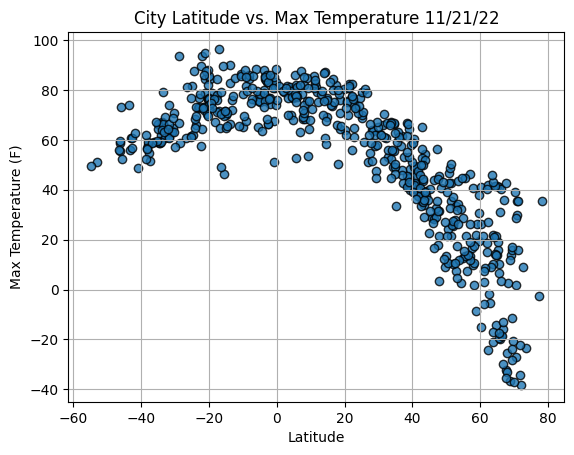

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

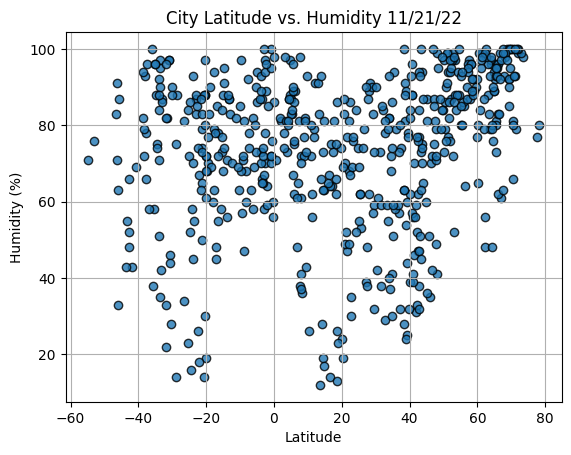

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

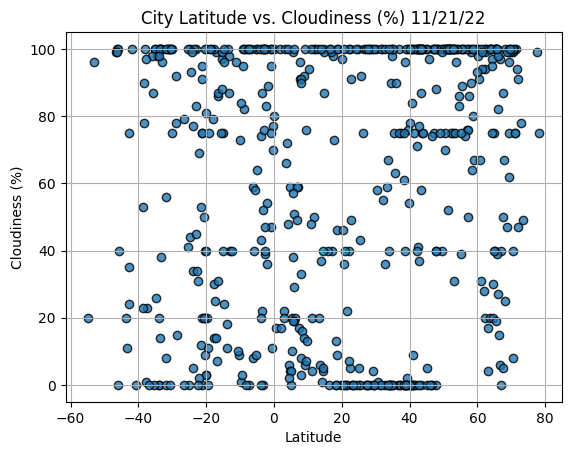

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

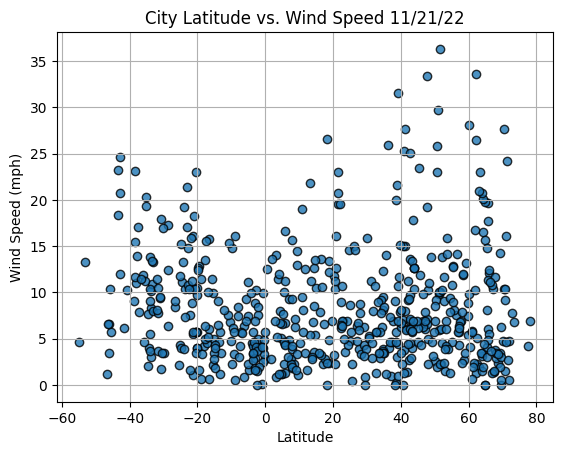

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [ ]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [26]:
index13 = new_city_df.loc[13]
index13

City                   Butaritari
Country                        KI
Date          2022-11-22 02:29:31
Lat                        3.0707
Lng                      172.7902
Max Temp                    81.46
Humidity                       78
Cloudiness                     22
Wind Speed                   14.0
Name: 13, dtype: object

In [28]:
new_city_df["Lat"] >= 0

0       True
1       True
2      False
3      False
4      False
       ...  
567     True
568     True
569     True
570     True
571     True
Name: Lat, Length: 572, dtype: bool

In [29]:
new_city_df.loc[(new_city_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hovd,MN,2022-11-22 02:28:18,48.0056,91.6419,21.60,41,100,4.97
1,Port Blair,IN,2022-11-22 02:29:28,11.6667,92.7500,81.12,77,100,3.40
6,Makaha,US,2022-11-22 02:29:29,21.4694,-158.2175,82.31,47,0,19.57
8,Kapaa,US,2022-11-22 02:29:30,22.0752,-159.3190,82.38,68,40,19.57
9,Khatanga,RU,2022-11-22 02:29:30,71.9667,102.5000,-38.25,99,91,0.49


In [32]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = new_city_df.loc[(new_city_df["Lat"] >= 0)]
southern_hemi_df = new_city_df.loc[(new_city_df["Lat"] < 0)]

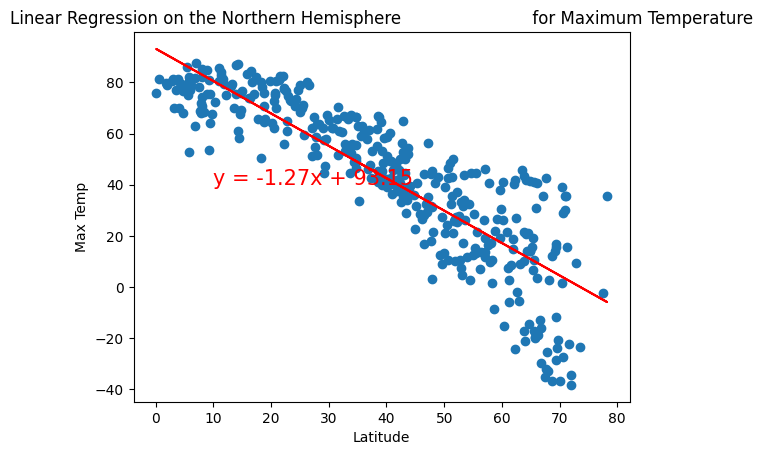

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

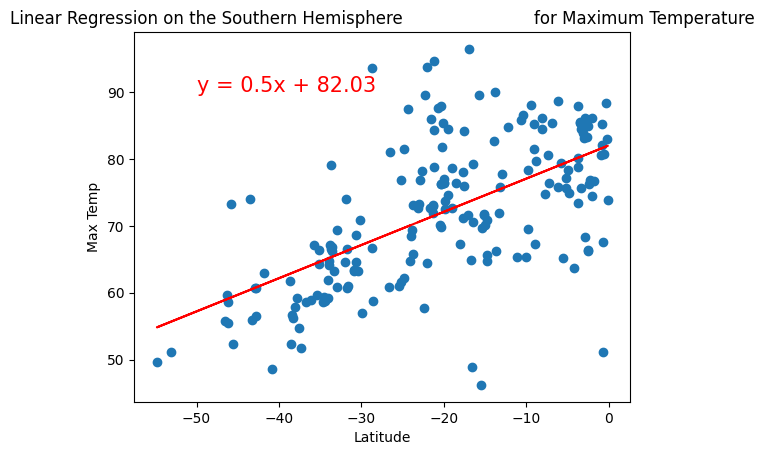

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

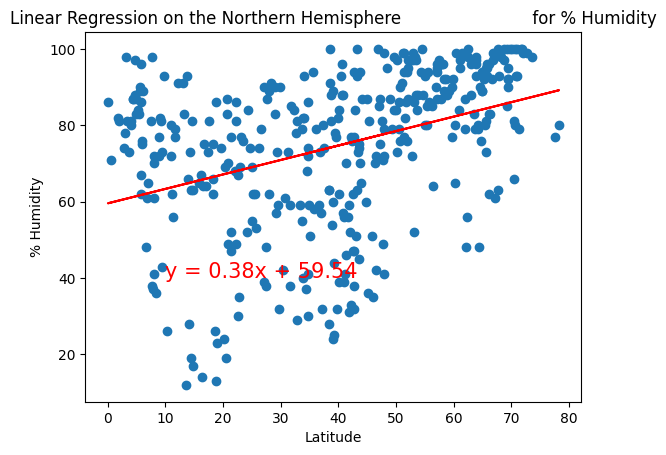

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(10,40))

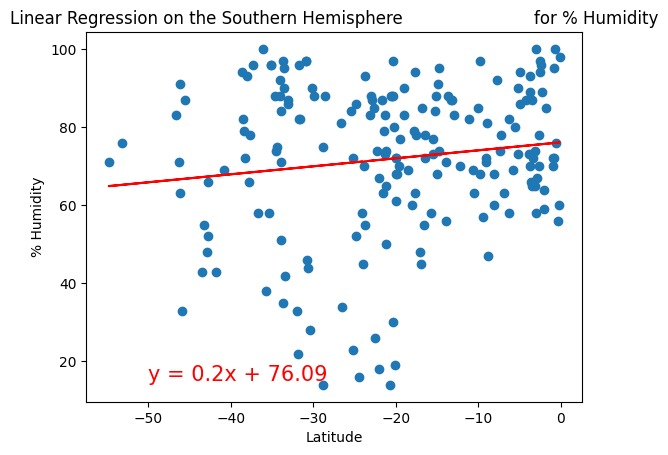

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

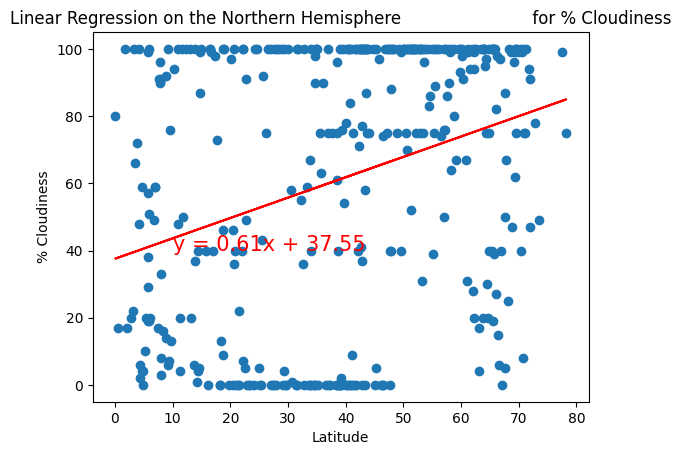

In [44]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,40))

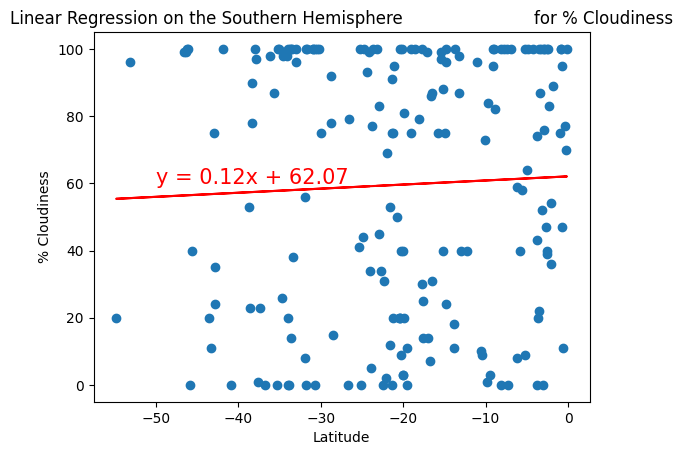

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

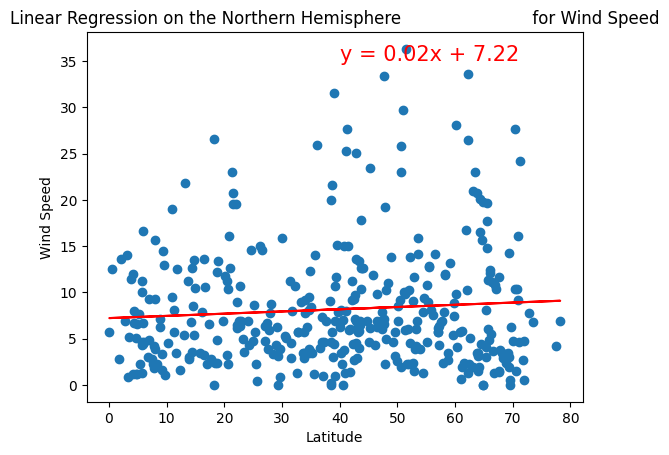

In [48]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

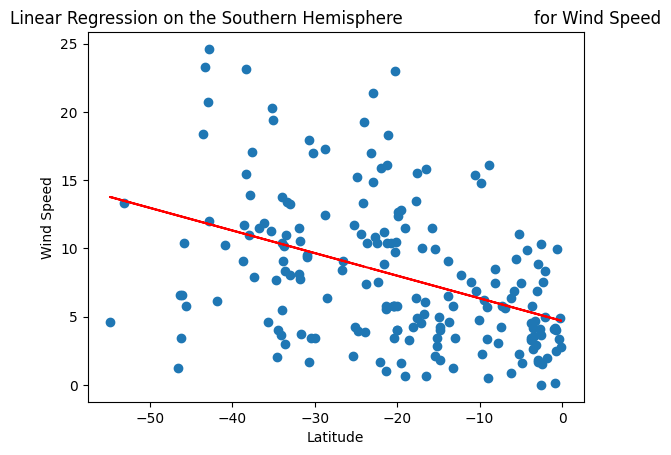

In [54]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))